#دانلود دیتاست کارت ملی(اماده شده و لیبیل خورده توسط خودم)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="B7oNSv2eBt2WLWYjKjG1")
project = rf.workspace("meli-card").project("meli-card")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to meli-card-2 in yolov8:: 100%|██████████| 978/978 [00:00<00:00, 4347.35it/s]


#بارگذاری مدل yolo ورژن 8

In [1]:
!pip install ultralytics

from ultralytics import YOLO
model= YOLO("yolov8l.pt")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

100%|██████████| 83.7M/83.7M [00:00<00:00, 114MB/s]


#آموزش مدل بر روی دیتاست اختصاصی کارت ملی

In [ ]:
model.train(data="/content/drive/MyDrive/Colab Notebooks/final project/personal Dataset/data.yaml"
,epochs=55 , batch=8,
imgsz=640,
optimizer='AdamW',
weight_decay=0.0005,
dropout=0.1,
lr0= 0.001)

#ذخیره مدل با فرمت TensorRT برای افزایش سرعت بر روی GPU
model.export(format="engine")

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=final project/yolov8l.pt, data=/content/drive/MyDrive/Colab Notebooks/final project/personal Dataset/data.yaml, epochs=55, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

100%|██████████| 755k/755k [00:00<00:00, 43.3MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 159MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/final project/personal Dataset/train/labels.cache... 450 images, 0 backgrounds, 0 corrupt: 100%|██████████| 450/450 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1820, len(boxes) = 4500. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Colab Notebooks/final project/personal Dataset/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 100, len(boxes) = 230. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 55 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/55      5.38G      1.916        2.7      1.443         14        640: 100%|██████████| 57/57 [00:26<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         23        230      0.422      0.611      0.599      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/55      5.36G      1.354       1.26       1.14         26        640: 100%|██████████| 57/57 [00:23<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         23        230      0.535      0.701      0.657      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/55       5.4G      1.315      1.053      1.125         16        640: 100%|██████████| 57/57 [00:23<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         23        230      0.776      0.827      0.837      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/55      5.23G      1.285     0.8814      1.108         11        640: 100%|██████████| 57/57 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         23        230      0.711      0.858      0.787      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/55      5.34G      1.344     0.8597      1.141         29        640: 100%|██████████| 57/57 [00:23<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         23        230      0.904       0.89      0.971      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/55       5.4G      1.205     0.7509       1.08         24        640: 100%|██████████| 57/57 [00:23<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         23        230      0.965      0.951       0.98      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/55      5.32G      1.181     0.7085      1.063         34        640: 100%|██████████| 57/57 [00:23<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         23        230      0.912      0.929       0.98      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/55      5.42G      1.147     0.6679       1.05         24        640: 100%|██████████| 57/57 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         23        230      0.974      0.979      0.989      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/55      5.39G      1.155     0.6539      1.075         12        640: 100%|██████████| 57/57 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         23        230      0.965      0.984      0.984      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/55      5.37G      1.137     0.6127      1.044         22        640: 100%|██████████| 57/57 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         23        230      0.976       0.99      0.987      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/55      5.41G      1.139     0.6047      1.046         53        640: 100%|██████████| 57/57 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         23        230      0.971       0.99      0.992      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/55      5.22G      1.113     0.5984      1.061         20        640: 100%|██████████| 57/57 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         23        230      0.975      0.988      0.989      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/55      5.35G      1.103      0.574      1.043         31        640: 100%|██████████| 57/57 [00:24<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         23        230      0.985      0.988       0.99       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/55      5.41G      1.071      0.554      1.035         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         23        230      0.979       0.97      0.989       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/55      5.33G       1.07     0.5385       1.03          8        640: 100%|██████████| 57/57 [00:23<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         23        230      0.989      0.993       0.99      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/55      5.35G       1.08       0.54      1.027         12        640: 100%|██████████| 57/57 [00:26<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         23        230      0.985      0.995       0.99      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/55      5.42G      1.036     0.5188      1.017         21        640: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         23        230      0.983      0.993      0.989      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/55      5.38G      1.063     0.5259       1.03         27        640: 100%|██████████| 57/57 [00:24<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         23        230      0.978      0.986      0.991      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/55      5.34G      1.068     0.5202      1.017         15        640: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         23        230      0.985      0.993      0.991      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/55      5.21G      1.037     0.5026      1.007         65        640: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         23        230      0.989      0.995      0.992      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/55       5.4G      1.013     0.4858      0.999         32        640: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         23        230      0.981      0.993      0.993      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/55      5.34G      1.012     0.4925     0.9963         44        640: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         23        230      0.983      0.993      0.991      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/55      5.39G      1.042     0.4996     0.9916         11        640: 100%|██████████| 57/57 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         23        230      0.986       0.99      0.991      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/55      5.34G     0.9885     0.4597     0.9927         28        640: 100%|██████████| 57/57 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         23        230       0.98      0.994      0.992       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/55      5.39G      1.023     0.4773      0.993         50        640: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         23        230      0.989      0.995      0.993      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/55      5.34G      1.008     0.4845     0.9895         20        640: 100%|██████████| 57/57 [00:24<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         23        230       0.99      0.995      0.993      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/55       5.4G      1.005      0.472     0.9937         38        640: 100%|██████████| 57/57 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         23        230      0.988      0.997      0.993      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/55      5.23G      1.006     0.4606     0.9993         19        640: 100%|██████████| 57/57 [00:24<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         23        230      0.985      0.992      0.992      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/55       5.4G     0.9934      0.473     0.9839         37        640: 100%|██████████| 57/57 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         23        230      0.989      0.993      0.992      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/55      5.35G     0.9768       0.45     0.9926         24        640: 100%|██████████| 57/57 [00:23<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         23        230      0.989      0.995      0.991      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/55       5.4G     0.9867     0.4537     0.9914         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         23        230      0.987      0.993      0.991      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/55       5.4G     0.9888     0.4587     0.9858         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         23        230      0.989      0.994       0.99      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/55      5.34G     0.9764     0.4437     0.9899         29        640: 100%|██████████| 57/57 [00:23<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         23        230      0.985      0.994       0.99       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/55      5.41G      0.969     0.4384     0.9746         50        640: 100%|██████████| 57/57 [00:23<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         23        230      0.988      0.996      0.992      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/55      5.42G     0.9482     0.4335     0.9702         26        640: 100%|██████████| 57/57 [00:23<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         23        230      0.991      0.993      0.993      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/55      5.17G     0.9525     0.4327     0.9724         36        640: 100%|██████████| 57/57 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         23        230      0.992      0.996       0.99      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/55       5.4G      0.944     0.4297      0.964         24        640: 100%|██████████| 57/57 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         23        230      0.989      0.994      0.991      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/55      5.41G     0.9541     0.4383     0.9678         31        640: 100%|██████████| 57/57 [00:23<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         23        230       0.99      0.996      0.992      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/55       5.4G     0.9489     0.4313     0.9729         21        640: 100%|██████████| 57/57 [00:24<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         23        230      0.989      0.996      0.992      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/55       5.4G     0.9488     0.4357      0.962         27        640: 100%|██████████| 57/57 [00:23<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         23        230      0.989      0.996      0.993      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/55       5.4G     0.9567     0.4245     0.9777         27        640: 100%|██████████| 57/57 [00:23<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         23        230      0.984      0.994      0.991      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/55      5.36G     0.9357     0.4364     0.9717         55        640: 100%|██████████| 57/57 [00:24<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         23        230      0.985      0.994      0.991      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/55      5.35G     0.9269     0.4282     0.9618         50        640: 100%|██████████| 57/57 [00:24<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         23        230      0.988      0.996      0.992      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/55      5.23G     0.9294      0.419     0.9712         22        640: 100%|██████████| 57/57 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         23        230       0.99      0.993      0.992      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/55      5.41G     0.9413     0.4144     0.9656         16        640: 100%|██████████| 57/57 [00:23<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]


                   all         23        230      0.991      0.993      0.992      0.753
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/55      5.34G      0.892       0.37     0.9819         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         23        230      0.989      0.994      0.992      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/55      5.34G     0.8843     0.3646     0.9762         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         23        230       0.99      0.996      0.993      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/55      5.35G     0.8718      0.363     0.9638         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]


                   all         23        230      0.991      0.995      0.992      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/55      5.35G     0.8731     0.3569      0.974         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         23        230       0.99      0.995      0.992      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/55      5.35G     0.8615     0.3515      0.972         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         23        230      0.986      0.995      0.992      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/55      5.35G     0.8606     0.3492     0.9706         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         23        230      0.989      0.995      0.992      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/55      5.16G     0.8655     0.3512     0.9651         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         23        230      0.989      0.996      0.992      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/55      5.34G     0.8525     0.3457      0.967         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         23        230      0.989      0.996      0.991      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/55      5.33G     0.8429     0.3436     0.9666         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


                   all         23        230       0.99      0.995      0.991      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/55      5.34G     0.8521     0.3406     0.9665         20        640: 100%|██████████| 57/57 [00:23<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         23        230      0.989      0.996      0.991      0.759



55 epochs completed in 0.418 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 87.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 87.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,614,318 parameters, 0 gradients, 164.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


                   all         23        230       0.99      0.996      0.993      0.766
             birth_day         23         23      0.999          1      0.995      0.706
           birth_month         23         23          1          1      0.995      0.756
            birth_year         23         23       0.98          1      0.995       0.81
            expiry_day         22         22      0.953          1      0.991      0.701
          expiry_month         23         23      0.988          1      0.995      0.707
           expiry_year         23         24      0.999      0.958      0.975       0.75
           father_name         23         23      0.997          1      0.995      0.769
            first_name         23         23      0.993          1      0.995      0.835
             last_name         23         23       0.99          1      0.995      0.798
           national_id         23         23      0.997          1      0.995      0.824
Speed: 0.3ms preproce

'runs/detect/train/weights/best.engine'

#تست و بررسی مدل اموزش دیده بر روی یک عکس دانلود شده از گوگل که در دیتاست نبوده

Loading /content/drive/MyDrive/Colab Notebooks/final project/runs/detect/train/weights/best.engine for TensorRT inference...
requirements: Ultralytics requirement ['tensorrt>7.0.0,!=10.1.0'] not found, attempting AutoUpdate...
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for tensorrt: filename=tensorrt-10.8.0.43-py2.py3-none-any.whl size=42246 sha256=ccab987c404a0b144bf6b17e001cae67f0e735fdd7db385a1776e21b3a0271ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-i2cz2db7/wheels/74/b9/22/cd396c2ef84d0f65b7ad3c218d00b8049e426d0fde196209bc
  Created wheel for tensorrt_cu12: filename=tensorrt_cu12-10.8.0.43-py2.py3-none-any.whl size=17595 sha256=e93d5e4d1b6d71d30f4b24e87675da3b28726071fb5217f06621246c0726bd44
  Stored in directory: /tmp/pip-ephem-wheel-cache-i2cz2db7/wheels/ef/cf/7c/93e4012a84c44ffa5cf2a6a7ea03b282a8

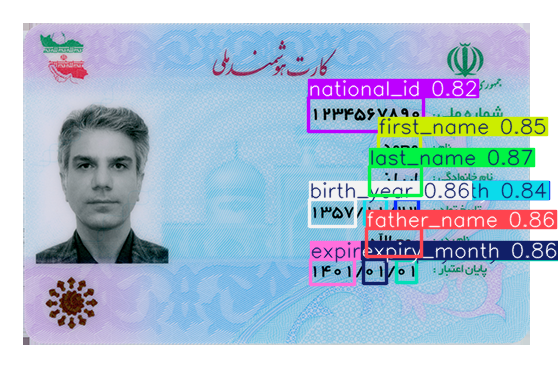

object 1
 - Label: last_name
 - Confidence: 0.87
 - Bounding Box: x1=369 y1=166 x2=421 y2=195
object 2
 - Label: birth_year
 - Confidence: 0.86
 - Bounding Box: x1=309 y1=199 x2=355 y2=226
object 3
 - Label: father_name
 - Confidence: 0.86
 - Bounding Box: x1=366 y1=228 x2=421 y2=256
object 4
 - Label: expiry_month
 - Confidence: 0.86
 - Bounding Box: x1=363 y1=259 x2=386 y2=283
object 5
 - Label: first_name
 - Confidence: 0.85
 - Bounding Box: x1=378 y1=135 x2=420 y2=161
object 6
 - Label: birth_month
 - Confidence: 0.84
 - Bounding Box: x1=364 y1=199 x2=386 y2=224
object 7
 - Label: expiry_year
 - Confidence: 0.84
 - Bounding Box: x1=310 y1=259 x2=354 y2=284
object 8
 - Label: national_id
 - Confidence: 0.82
 - Bounding Box: x1=308 y1=97 x2=423 y2=131
object 9
 - Label: birth_day
 - Confidence: 0.81
 - Bounding Box: x1=395 y1=199 x2=418 y2=224
object 10
 - Label: expiry_day
 - Confidence: 0.79
 - Bounding Box: x1=396 y1=260 x2=416 y2=282


In [2]:
model= YOLO("/content/drive/MyDrive/Colab Notebooks/final project/runs/detect/train/weights/best.engine")

image_path="/content/drive/MyDrive/Colab Notebooks/final project/test_image.jpg"

res= model(image_path)

res[0].show()


for i,box in enumerate(res[0].boxes):
  class_id= int(box.cls.item())             #convert the tensor to an integer
  confidence=box.conf.item()                  #convert the tensor to a float
  label= model.names[class_id]                #get the class label
  x1,y1,x2,y2= map(int,box.xyxy[0].tolist())      #convert the coordinates to integers

  print(f"object {i+1}")
  print(f" - Label: {label}")
  print(f" - Confidence: {confidence:.2f}")
  print(f" - Bounding Box: x1={x1} y1={y1} x2={x2} y2={y2}")

#نتیجه نسبتا خوب بوده حالا باید کادر های تشخیص داده شده رو برش بزنیم و بدیم به مدلی که بتونه اون رو تبدیل به متن کنه

##از مدل easyocr برای تبدیل به متن استفاده میکنیم که از زبان فارسی پشتیبانی میکنه و سرعت و دقت خوبی داره

In [3]:
!pip install easyocr opencv-python

import easyocr                        #EasyOCR مدل استخراج متن
import cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 24.5 MB/s eta 0:00:00


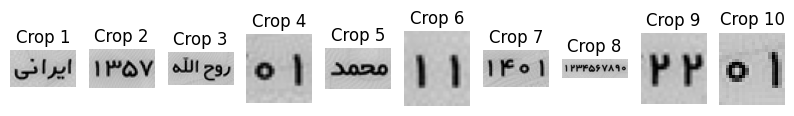

In [50]:
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/final project/test_image.jpg")
images=[]
for box in (res[0].boxes):
  x1,y1,x2,y2= map(int,box.xyxy[0].tolist())
  croped=img[y1:y2, x1:x2]

  gray=cv2.cvtColor(croped,cv2.COLOR_RGB2GRAY)
  images.append(gray)


import matplotlib.pyplot as plt

# تنظیم اندازه شکل خروجی
plt.figure(figsize=(10, 5))

# نمایش هر تصویر در یک subplot جداگانه
for i, img in enumerate(images):
    plt.subplot(1, len(images), i+1)  # تنظیم نمایش در یک ردیف
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # تبدیل BGR به RGB
    plt.axis("off")  # حذف محور مختصات
    plt.title(f"Crop {i+1}")

plt.show()

In [51]:
#ایجاد ابجکت reader برای زبان فارسی
reader = easyocr.Reader(['fa'],gpu=True)

for image in images:
  text=reader.readtext(image)
  for t in text:
    print(t[1])

ایرانی
١٣٥٧
الله
روح
محمد
١٤٥
٢٣٤٥٦٧٨٩٥


#اکنون نوبت ترکیب دو مدل و ذخیره اونها در فایل csv

#ادامه در ماژول project2 ...